1. 18_Charge_data.csv 와 18_Customer_data.csv를 불러와 각각 df_charge, df_customer로 선언 후, 데이터의 구조와 타입확인
2. 매출에 대한 추세를 분석하고자 한다. 시간이 지남에 따라 고객들이 지불하는 총과금액과 평균과금액에 대한 추세를 시각화로 확인하시오.
3. 고객의 기본적인 특성(성별/연령대/결혼여부/부양자여부)와 서비스유지/이탈고객의 유의미한 차이가 있는지 확인하시오.
4. 고객의 정보를 입력했을 때, 해당 고객이 이탈할 확률에 대한 분류모델을 생성하고, 평가 한 뒤, 각 고객정보가 이탈 확률에 얼마나 영향을 주고 있는가를 확인하시오.
    - 필수로 들어가야 할 정보 : 고객 기본정보 (성별 / 연령 등)
    - 추가로 고려할 정보 : 고객의 서비스 가입 정보 (보안 / 기술지원 등), 만족도 등
5. 두 데이터를 활용해 한 명의 고객이 결제한 총 결제금액을 고객 ID 별로 정리하고, 한명의 고객 금액, 과금 빈도, 최근성등을 이용해, RFM 분석을 실시해 고객을 5등급으로 분류하시오.
    - 금액은 0.5 / 빈도는 기간 내 전체 빈도로 0.3 / 최근성은 -0.2 가중치 부여
6. 5등급으로 부여된 고객 등급 별 고객 연령대의 비율이 어떻게 달라지는지 계산하시오.

In [1]:
import pandas as pd

In [2]:
# 1. 18_Charge_data.csv 와 18_Customer_data.csv를 불러와 각각 df_charge, df_customer로 선언 후, 데이터의 구조와 타입확인

df_charge = pd.read_csv('실습 파일/18_Charge_data.csv', encoding='cp949')
del df_charge['Unnamed: 0']
df_charge.head(3)

,고객ID,과금일,과금액
0,C-10001,2020-04-01,84600
1,C-10001,2020-05-01,83500
2,C-10001,2020-06-01,85700


In [3]:
df_charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291334 entries, 0 to 291333
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객ID    291334 non-null  object
 1   과금일     291334 non-null  object
 2   과금액     291334 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.7+ MB


In [4]:
df_customer = pd.read_csv('실습 파일/18_Customer_data.csv', encoding='cp949')
del df_customer['Unnamed: 0']
df_customer.head(3)

,고객ID,성별,연령,결혼여부,부양자유무,부양자수,추천횟수,영수증발급여부,과금방식,보안서비스,...,종료일,고객이탈여부,이탈가능점수,이탈유형,이탈사유,LTV,만족도,데이터사용료,로밍사용료,총로밍요금
0,C-10001,여성,37,Yes,No,0,2,Yes,신용카드,No,...,2022-01-01,No,65,NaN,NaN,2205,3,0,47910,431100
1,C-10002,남성,46,No,No,0,0,No,신용카드,No,...,2022-01-01,No,66,NaN,NaN,5414,5,11300,12090,108710
2,C-10003,남성,50,No,No,0,0,Yes,계좌이체,No,...,2021-02-01,Yes,71,Competitor,Price too high,4479,1,0,38080,152100


In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   고객ID     6863 non-null   object
 1   성별       6863 non-null   object
 2   연령       6863 non-null   int64 
 3   결혼여부     6863 non-null   object
 4   부양자유무    6863 non-null   object
 5   부양자수     6863 non-null   int64 
 6   추천횟수     6863 non-null   int64 
 7   영수증발급여부  6863 non-null   object
 8   과금방식     6863 non-null   object
 9   보안서비스    6863 non-null   object
 10  백업서비스    6863 non-null   object
 11  기술지원서비스  6863 non-null   object
 12  데이터무제한   6863 non-null   object
 13  데이터사용량   6863 non-null   int64 
 14  시작일      6863 non-null   object
 15  종료일      6863 non-null   object
 16  고객이탈여부   6863 non-null   object
 17  이탈가능점수   6863 non-null   int64 
 18  이탈유형     1702 non-null   object
 19  이탈사유     1702 non-null   object
 20  LTV      6863 non-null   int64 
 21  만족도      6863 non-null   int64 
 22  

In [6]:
# 2. 매출에 대한 추세를 분석하고자 한다. 
# 시간이 지남에 따라 고객들이 지불하는 총 과금액과 평균 과금액에 대한 추세를 시각화로 확인하시오.
df_charge['과금일'] = pd.to_datetime(df_charge['과금일'])
df_charge['과금일']

0        2020-04-01
1        2020-05-01
2        2020-06-01
3        2020-07-01
4        2020-08-01
            ...    
291329   2021-08-01
291330   2021-09-01
291331   2021-10-01
291332   2021-11-01
291333   2021-12-01
Name: 과금일, Length: 291334, dtype: datetime64[ns]

In [7]:
sample = df_charge.pivot_table(index='과금일', values='과금액', aggfunc=['sum', 'mean']).reset_index()
sample

,과금일,sum,mean
,,과금액,과금액
0,2015-01-01,33668700,94575.000000
1,2015-02-01,47767700,91860.961538
2,2015-03-01,57274900,91057.074722
3,2015-04-01,64441700,89751.671309
4,2015-05-01,72681700,89180.000000
...,...,...,...
79,2021-08-01,438558700,74496.127060
80,2021-09-01,425799900,74090.812598
81,2021-10-01,416085400,73800.177368


In [8]:
sample2 = pd.melt(sample, id_vars='과금일')
sample2

,과금일,variable_0,variable_1,value
0,2015-01-01,sum,과금액,3.366870e+07
1,2015-02-01,sum,과금액,4.776770e+07
2,2015-03-01,sum,과금액,5.727490e+07
3,2015-04-01,sum,과금액,6.444170e+07
4,2015-05-01,sum,과금액,7.268170e+07
...,...,...,...,...
163,2021-08-01,mean,과금액,7.449613e+04
164,2021-09-01,mean,과금액,7.409081e+04
165,2021-10-01,mean,과금액,7.380018e+04
166,2021-11-01,mean,과금액,7.296644e+04


<Axes: xlabel='과금일', ylabel='value'>

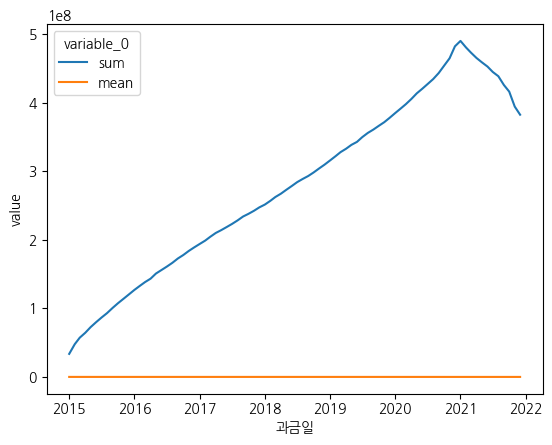

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
sample3 = sample2[['과금일','variable_0','value']]
sns.lineplot(x=sample3['과금일'], y=sample3['value'],hue=sample3['variable_0'])

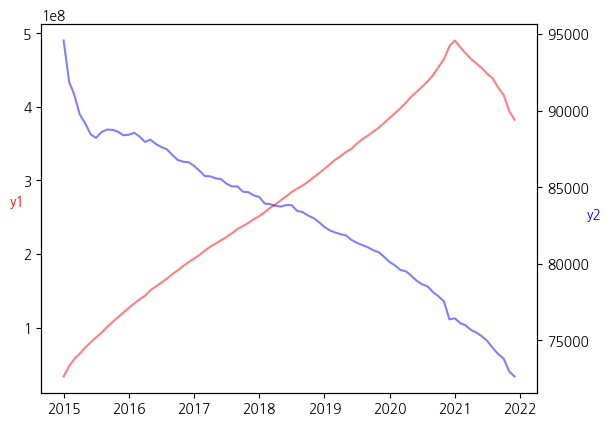

In [10]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
x=sample3['과금일'][:84]
y1=sample3[sample3['variable_0']=='sum']['value']
y2=sample3[sample3['variable_0']=='mean']['value']

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color = 'red', alpha = 0.5)
# y축 라벨 및 범위 지정
ax1.set_ylabel('y1', color = 'red', rotation = 0)

ax2 = ax1.twinx()
ax2.plot(x, y2, color = 'blue', alpha = 0.5)
# y축 라벨 및 범위 지정
ax2.set_ylabel('y2', color = 'blue', rotation = 0)

plt.show()

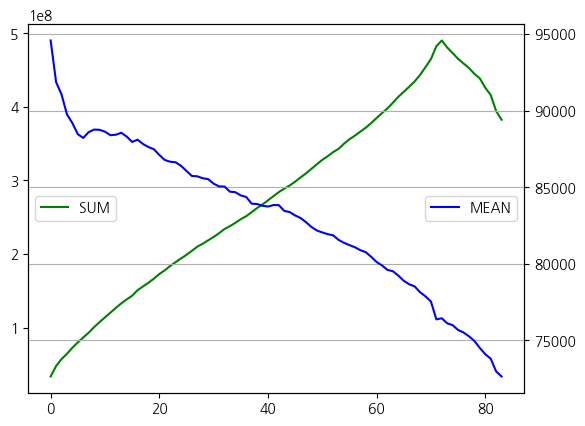

In [11]:
a = df_charge.pivot_table(index='과금일', values='과금액', aggfunc=['sum', 'mean']).reset_index()

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(a['sum']['과금액'], label = 'SUM', c='g')

# x축을 공유한다~! twinx
ax2 = ax1.twinx()
ax2.plot(a['mean']['과금액'], label = 'MEAN',c='b')

ax1.legend(loc='center left')
ax2.legend(loc='center right')

plt.grid()
plt.show()

In [12]:
# 3. 고객의 기본적인 특성(성별/연령대/결혼여부/부양자여부)와 서비스유지/이탈고객의 유의미한 차이가 있는지 확인하시오.
import scipy.stats as stats
#귀무 : 유의미한 차이가 없다
#대립 : 유의미한 차이가 있다

sample = df_customer[['성별','연령','결혼여부','부양자유무','고객이탈여부']]

cross = pd.crosstab(index=sample['성별'], columns=sample['고객이탈여부'])
a,p,n,table = stats.chi2_contingency(cross)
print(p, '유의미한 차이가 없다')

0.7144761467274232 유의미한 차이가 없다


In [13]:
cross = pd.crosstab(index=sample['연령'], columns=sample['고객이탈여부'])
a,p,n,table = stats.chi2_contingency(cross)
print(p, '유의미한 차이가 있다')

2.2407807851385694e-20 유의미한 차이가 있다


In [14]:
cross = pd.crosstab(index=sample['결혼여부'], columns=sample['고객이탈여부'])
a,p,n,table = stats.chi2_contingency(cross)
print(p, '유의미한 차이가 있다')

5.1517190644471296e-18 유의미한 차이가 있다


In [15]:
cross = pd.crosstab(index=sample['부양자유무'], columns=sample['고객이탈여부'])
a,p,n,table = stats.chi2_contingency(cross)
print(p, '유의미한 차이가 있다')

1.457366170953964e-75 유의미한 차이가 있다


In [29]:
# 4. 고객의 정보를 입력했을 때, 해당 고객이 이탈할 확률에 대한 분류모델을 생성하고, 
# 평가 한 뒤, 각 고객정보가 이탈 확률에 얼마나 영향을 주고 있는가를 확인하시오.
# 필수로 들어가야 할 정보 : 고객 기본정보 (성별 / 연령 등)
# 추가로 고려할 정보 : 고객의 서비스 가입 정보 (보안 / 기술지원 등), 만족도 등

data = df_customer[['성별','연령','결혼여부','부양자유무',
             '과금방식','보안서비스','백업서비스','기술지원서비스','만족도']]

def ages(x):
    return str(x)[0]+'0대'
    
data['연령대']=data['연령'].apply(ages)
del data['연령']
data

C:\Users\campus2H018\AppData\Local\Temp\ipykernel_19400\1130796350.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['연령대']=data['연령'].apply(ages)


,성별,결혼여부,부양자유무,과금방식,보안서비스,백업서비스,기술지원서비스,만족도,연령대
0,여성,Yes,No,신용카드,No,Yes,Yes,3,30대
1,남성,No,No,신용카드,No,No,No,5,40대
2,남성,No,No,계좌이체,No,No,No,1,50대
3,남성,Yes,No,계좌이체,No,Yes,No,1,70대
4,여성,Yes,No,신용카드,No,No,Yes,1,70대
...,...,...,...,...,...,...,...,...,...
6858,여성,No,No,신용카드,Yes,No,Yes,4,20대
6859,남성,Yes,No,계좌이체,No,No,No,1,40대
6860,남성,No,No,신용카드,No,Yes,No,5,20대
6861,남성,No,No,신용카드,Yes,No,Yes,3,20대


In [24]:
## 강사님
X = pd.get_dummies(data, drop_first=True)
X2 = X.to_numpy()
y = df_customer['고객이탈여부'].replace('Yes',1).replace('No',0)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

train_x, test_x, train_y, test_y = train_test_split(X2,y)


ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

lg = LogisticRegression()
lg.fit(train_scaled, train_y)

report = classification_report(test_y, lg.predict(test_scaled))
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1281
           1       0.96      0.78      0.86       435

    accuracy                           0.94      1716
   macro avg       0.94      0.88      0.91      1716
weighted avg       0.94      0.94      0.93      1716



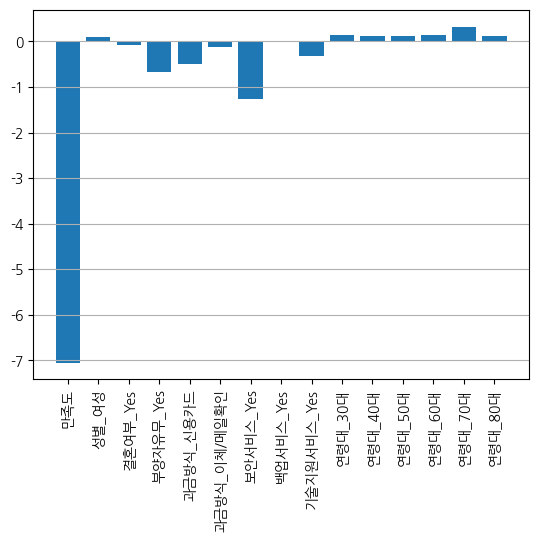

In [25]:
plt.bar(X.columns, lg.coef_[0])
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [26]:
## 강사님 파이프라인
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

category = ['성별','보안서비스','기술지원서비스','결혼여부','부양자유무',
            '백업서비스','데이터무제한']
category_transformer = OneHotEncoder(drop='first')

numeric = ['연령','만족도','부양자수']
numeric_transformer = make_pipeline(SimpleImputer(strategy = 'mean'),
                                   StandardScaler())

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric),
    ("cat", category_transformer, category)
])

# train 데이터에서는 smote가 적용, test에서는 아님!
pipeline = make_pipeline(preprocessor, SMOTE(), LogisticRegression())
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['연령', '만족도', '부양자수']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['성별', '보안서비스', '기술지원서비스',
                                                   '결혼여부', '부양자유무', '백업서비스',
                                                   '데이터무제한'])])),
                ('smote', SMOTE()),
                ('logisticregression', LogisticRegression())])

In [32]:
data = df_customer[['성별','보안서비스','기술지원서비스','결혼여부','부양자유무',
            '백업서비스','데이터무제한','연령','만족도','부양자수']]

data

y = df_customer['고객이탈여부']

train_x, test_x, train_y, test_y = train_test_split(data,y)
pipeline.fit(train_x, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['연령', '만족도', '부양자수']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['성별', '보안서비스', '기술지원서비스',
                                                   '결혼여부', '부양자유무', '백업서비스',
                                                   '데이터무제한'])])),
                ('smote', SMOTE()),
                ('logisticregression', LogisticRegression())])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['과금방식']= encoder.fit_transform(data['과금방식'])

encoder = LabelEncoder()
data['연령대'] = encoder.fit_transform(data['연령대'])

data['성별'] = data['성별'].replace('남성',0).replace('여성',1)
data['결혼여부'] = data['결혼여부'].replace('Yes',1).replace('No',0)
data['부양자유무'] = data['부양자유무'].replace('Yes',1).replace('No',0)
data['보안서비스'] = data['보안서비스'].replace('Yes',1).replace('No',0)
data['백업서비스'] = data['백업서비스'].replace('Yes',1).replace('No',0)
data['기술지원서비스'] = data['기술지원서비스'].replace('Yes',1).replace('No',0)

data

In [120]:
X = data.to_numpy()
y = df_customer['고객이탈여부'].replace('Yes',1).replace('No',0)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y)

#l2 는 Ridge # C는 알파 값 (l2의 알파)
lg = LogisticRegression(max_iter = 10000, penalty='l2', 
                        solver='liblinear') 
lg.fit(train_x, train_y)
lg.score(test_x, test_y),lg.score(train_x, train_y)

(0.9312354312354313, 0.9457936662133282)

In [151]:
lg.coef_

array([[ 0.26870371, -0.13544804, -1.71434122, -0.49826218, -2.46346924,
         0.0869954 , -0.49053687, -4.02751649,  0.15005715]])

In [153]:
sample = pd.DataFrame({'col': data.columns,
                      'coef':lg.coef_[0]})
sample

,col,coef
0,성별,0.268704
1,결혼여부,-0.135448
2,부양자유무,-1.714341
3,과금방식,-0.498262
4,보안서비스,-2.463469
5,백업서비스,0.086995
6,기술지원서비스,-0.490537
7,만족도,-4.027516
8,연령대,0.150057


In [56]:
# 5. 두 데이터를 활용해 
# 한 명의 고객이 결제한 총 결제금액을 고객 ID 별로 정리하고, 
# 한명의 고객 금액, 과금 빈도, 최근성등을 이용해, 
data = pd.merge(df_customer, df_charge, on='고객ID')

data['연령대'] = data['연령'].apply(ages)

In [57]:
data['종료일'] = pd.to_datetime(data['종료일'])
data['과금일'] = pd.to_datetime(data['과금일'])

In [58]:
# 최근성
a = max(data['과금일']) - data['과금일']
data['Recency'] = a.dt.days

In [59]:
data2 = data.pivot_table(index='고객ID',values=['과금액','Recency'],
                aggfunc={'과금액':'sum', 'Recency':'min'}).reset_index()

data2

,고객ID,Recency,과금액
0,C-10001,0,1755400
1,C-10002,0,1447500
2,C-10003,303,490900
3,C-10004,153,1578400
4,C-10005,61,378000
...,...,...,...
6858,C-17039,0,1610700
6859,C-17040,334,2343500
6860,C-17041,0,792400
6861,C-17042,0,6328500


In [60]:
#빈도계산

data['Frequency']=1
p1 = data.pivot_table(index=['고객ID','과금일'], 
                      values='Frequency', aggfunc='sum').reset_index()
p1

,고객ID,과금일,Frequency
0,C-10001,2020-04-01,1
1,C-10001,2020-05-01,1
2,C-10001,2020-06-01,1
3,C-10001,2020-07-01,1
4,C-10001,2020-08-01,1
...,...,...,...
291329,C-17043,2021-08-01,1
291330,C-17043,2021-09-01,1
291331,C-17043,2021-10-01,1
291332,C-17043,2021-11-01,1


In [61]:
# 주문자가 매장에 총 몇 번 왔는지
p2 = data.pivot_table(index = "고객ID",values = "Frequency", 
                      aggfunc="sum").reset_index()

p2

,고객ID,Frequency
0,C-10001,21
1,C-10002,21
2,C-10003,5
3,C-10004,14
4,C-10005,4
...,...,...
6858,C-17039,25
6859,C-17040,23
6860,C-17041,14
6861,C-17042,79


In [62]:
m1 = data2.merge(p2, on='고객ID')
m1

,고객ID,Recency,과금액,Frequency
0,C-10001,0,1755400,21
1,C-10002,0,1447500,21
2,C-10003,303,490900,5
3,C-10004,153,1578400,14
4,C-10005,61,378000,4
...,...,...,...,...
6858,C-17039,0,1610700,25
6859,C-17040,334,2343500,23
6860,C-17041,0,792400,14
6861,C-17042,0,6328500,79


In [63]:
m1.describe()

,Recency,과금액,Frequency
count,6863.000000,6.863000e+03,6863.000000
mean,40.876585,3.423892e+06,42.449949
std,88.388811,3.008542e+06,26.246790
min,0.000000,4.240000e+04,2.000000
25%,0.000000,9.770000e+05,19.000000
50%,0.000000,2.310800e+06,40.000000
75%,0.000000,5.482450e+06,67.000000
max,334.000000,1.167510e+07,84.000000


In [64]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
m1['Recency'] = mms.fit_transform(m1['Recency'].to_numpy().reshape(-1,1))

m1['Frequency'] = mms.fit_transform(m1['Frequency'].to_numpy().reshape(-1,1))

m1['과금액'] = mms.fit_transform(m1['과금액'].to_numpy().reshape(-1,1))

m1

,고객ID,Recency,과금액,Frequency
0,C-10001,0.000000,0.147257,0.231707
1,C-10002,0.000000,0.120789,0.231707
2,C-10003,0.907186,0.038555,0.036585
3,C-10004,0.458084,0.132042,0.146341
4,C-10005,0.182635,0.028850,0.024390
...,...,...,...,...
6858,C-17039,0.000000,0.134818,0.280488
6859,C-17040,1.000000,0.197813,0.256098
6860,C-17041,0.000000,0.064473,0.146341
6861,C-17042,0.000000,0.540382,0.939024


In [66]:
# RFM
# RFM 분석을 실시해 고객을 5등급으로 분류하시오.
# 금액은 0.5 / 빈도는 기간 내 전체 빈도로 0.3 / 최근성은 -0.2 가중치 부여

m1['Total'] = m1['Recency']*(-0.2) + m1['Frequency']*0.3 + m1['과금액']*0.5
m1

,고객ID,Recency,과금액,Frequency,Total
0,C-10001,0.000000,0.147257,0.231707,0.143141
1,C-10002,0.000000,0.120789,0.231707,0.129907
2,C-10003,0.907186,0.038555,0.036585,-0.151184
3,C-10004,0.458084,0.132042,0.146341,0.018306
4,C-10005,0.182635,0.028850,0.024390,-0.014785
...,...,...,...,...,...
6858,C-17039,0.000000,0.134818,0.280488,0.151555
6859,C-17040,1.000000,0.197813,0.256098,-0.024264
6860,C-17041,0.000000,0.064473,0.146341,0.076139
6861,C-17042,0.000000,0.540382,0.939024,0.551898


In [42]:
def func(x):
    value = m1['Total']
    if x>= value.quantile(0.8):
        return "1등급"
    elif x>=value.quantile(0.6):
        return '2등급'
    elif x>= value.quantile(0.4):
        return '3등급'
    elif x>= value.quantile(0.2):
        return '4등급'
    return '5등급'

m1['Rank'] = m1['Total'].apply(func)
m1

,고객ID,Recency,과금액,Frequency,Total,Rank
0,C-10001,0.000000,0.147257,0.231707,0.143141,4등급
1,C-10002,0.000000,0.120789,0.231707,0.129907,4등급
2,C-10003,0.907186,0.038555,0.036585,-0.151184,5등급
3,C-10004,0.458084,0.132042,0.146341,0.018306,5등급
4,C-10005,0.182635,0.028850,0.024390,-0.014785,5등급
...,...,...,...,...,...,...
6858,C-17039,0.000000,0.134818,0.280488,0.151555,4등급
6859,C-17040,1.000000,0.197813,0.256098,-0.024264,5등급
6860,C-17041,0.000000,0.064473,0.146341,0.076139,4등급
6861,C-17042,0.000000,0.540382,0.939024,0.551898,1등급


In [67]:
# 시간 단축시키는 방법
a = m1['Total'].quantile(0.8)
b = m1['Total'].quantile(0.6)
c = m1['Total'].quantile(0.4)
d = m1['Total'].quantile(0.2)

def func1(x):
    global a,b,c,d
    
    if x>= a:
        return "1등급"
    elif x>=b:
        return '2등급'
    elif x>= c:
        return '3등급'
    elif x>= d:
        return '4등급'
    return '5등급'

In [43]:
# 6. 5등급으로 부여된 고객 등급 별 고객 연령대의 비율이 어떻게 달라지는지 계산하시오.
df_customer['연령대']=df_customer['연령'].apply(ages)
df_customer

,고객ID,성별,연령,결혼여부,부양자유무,부양자수,추천횟수,영수증발급여부,과금방식,보안서비스,...,고객이탈여부,이탈가능점수,이탈유형,이탈사유,LTV,만족도,데이터사용료,로밍사용료,총로밍요금,연령대
0,C-10001,여성,37,Yes,No,0,2,Yes,신용카드,No,...,No,65,NaN,NaN,2205,3,0,47910,431100,30대
1,C-10002,남성,46,No,No,0,0,No,신용카드,No,...,No,66,NaN,NaN,5414,5,11300,12090,108710,40대
2,C-10003,남성,50,No,No,0,0,Yes,계좌이체,No,...,Yes,71,Competitor,Price too high,4479,1,0,38080,152100,50대
3,C-10004,남성,78,Yes,No,0,1,Yes,계좌이체,No,...,Yes,99,Dissatisfaction,Product dissatisfaction,3714,1,0,31410,408720,70대
4,C-10005,여성,75,Yes,No,0,3,Yes,신용카드,No,...,Yes,68,Dissatisfaction,Network reliability,3464,1,0,8360,24970,70대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,No,No,0,0,No,신용카드,Yes,...,No,59,NaN,NaN,3161,4,0,52770,685680,20대
6859,C-17040,남성,40,Yes,No,0,1,Yes,계좌이체,No,...,Yes,68,Dissatisfaction,Product dissatisfaction,5248,1,0,18310,402730,40대
6860,C-17041,남성,22,No,No,0,0,Yes,신용카드,No,...,No,33,NaN,NaN,5870,5,0,21020,42040,20대
6861,C-17042,남성,21,No,No,0,5,No,신용카드,Yes,...,No,59,NaN,NaN,4792,3,0,2370,160460,20대


In [44]:
sample = m1.merge(df_customer[['고객ID','연령대']], on='고객ID')

pd.crosstab(index=sample['Rank'], columns = sample['연령대'], 
            normalize='index',margins=True)

연령대,20대,30대,40대,50대,60대,70대,80대
Rank,,,,,,,
1등급,0.190823,0.185725,0.188638,0.171158,0.138383,0.115076,0.010197
2등급,0.198251,0.171283,0.187318,0.180029,0.150146,0.103499,0.009475
3등급,0.203205,0.184996,0.182811,0.182811,0.147851,0.092498,0.005827
4등급,0.209184,0.177843,0.206268,0.187318,0.132653,0.077988,0.008746
5등급,0.177713,0.196650,0.187910,0.165331,0.146395,0.114348,0.011653
All,0.195833,0.183302,0.190587,0.177328,0.143086,0.100685,0.009180
